In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### 1. Load the data file using pandas. 

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### 2. Check for null values in the data. Get the number of null values for each column.

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### 3. Drop records with nulls in any of the columns. 

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### 4.1 Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric. 
##### Extract the numeric value from the column. Multiply the value by 1,000, if size is mentioned in Mb

In [7]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M','')) * 1000
    elif 'K' in size:
        return float(size.replace('K',''))
    else:
        return None

In [9]:
df['Size'] = df['Size'].apply(convert_size)

C:\Users\HP\AppData\Local\Temp\ipykernel_4036\636738191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].apply(convert_size)


In [10]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            7466 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


#### 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [12]:
df["Reviews"] = df["Reviews"].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_4036\2152764828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Reviews"] = df["Reviews"].astype(int)


In [13]:
df['Reviews'].dtype

dtype('int32')

#### 4.3 Installs field is currently stored as string and has values like 1,000,000+. Treat 1,000,000+ as 1,000,000, remove ‘+’, ‘,’ from the field, convert it to integer

In [14]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')

C:\Users\HP\AppData\Local\Temp\ipykernel_4036\1670448764.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')
C:\Users\HP\AppData\Local\Temp\ipykernel_4036\1670448764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].str.replace('+','')
C:\Users\HP\AppData\Local\Temp\ipykernel_4036\1670448764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [15]:
df['Installs'] = df['Installs'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_4036\2979654311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].astype(int)


In [16]:
df['Installs'].dtype

dtype('int32')

#### 4.4 Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [17]:
df['Price'] = df['Price'].str.replace('$','')

C:\Users\HP\AppData\Local\Temp\ipykernel_4036\1580091000.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','')
C:\Users\HP\AppData\Local\Temp\ipykernel_4036\1580091000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('$','')


In [18]:
df['Price'] = df['Price'].astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_4036\2832233996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(float)


In [19]:
df['Price'].dtype

dtype('float64')

#### 5. Sanity Checks 
#### 5.1 Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [20]:
df.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### 5.2 Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [21]:
df[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,NaN,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [22]:
df.shape

(9360, 13)

In [23]:
df = df.drop(df[df['Reviews'] > df['Installs']].index)

In [24]:
df.shape

(9353, 13)

#### 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [25]:
len(df[(df.Type == 'Free') & (df.Price > 0)])

0

In [26]:
print ("Dataset doesn't have any rows where Price is greater than 0 for 'Free' type apps")

Dataset doesn't have any rows where Price is greater than 0 for 'Free' type apps


#### 6. Univariate Analysis
#### 6.1 Boxplot for Price. Are there any outliers? Think about the price of usual apps on Play Store.

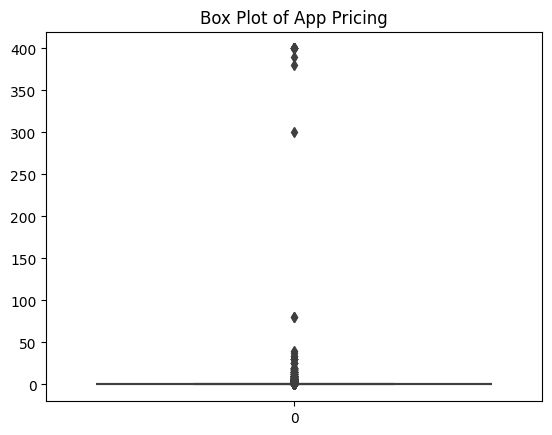

No outliers observed as there isn't a gradual spread of data to determine if any app is priced below or above the median range


In [27]:
sns.boxplot(df.Price)
plt.title("Box Plot of App Pricing")
plt.show()
print("No outliers observed as there isn't a gradual spread of data to determine if any app is priced below or above the median range")

#### 6.2 Boxplot for Reviews. Are there any apps with very high number of reviews? Do the values seem right?

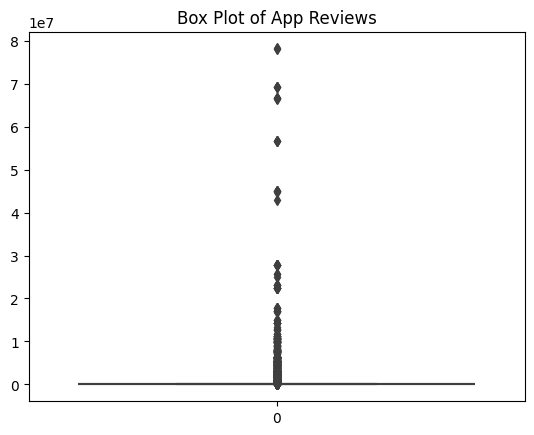

Box plot shows that there are apps with Reviews nearing 55-80 million and this could be due to the popularity of the Apps.


In [28]:
sns.boxplot(df.Reviews)
plt.title("Box Plot of App Reviews")
plt.show()
print("Box plot shows that there are apps with Reviews nearing 55-80 million and this could be due to the popularity of the Apps.")

#### 6.3 Histogram for Rating. How are the ratings distributed? Is it more toward higher ratings?

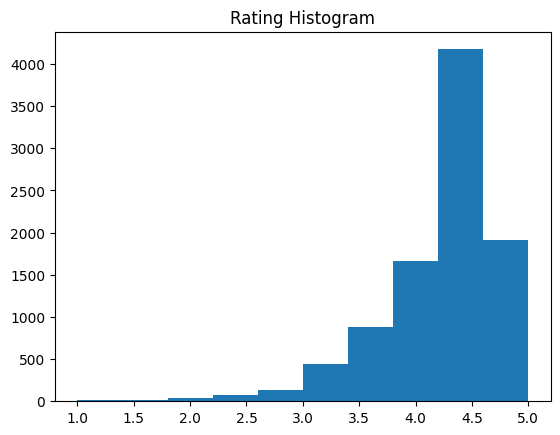

Distribution of Ratings are left-skewed or of Negative skewness and distribution is more towards higher ratings.


In [29]:
plt.hist(df.Rating)
plt.title("Rating Histogram")
plt.show()
print("Distribution of Ratings are left-skewed or of Negative skewness and distribution is more towards higher ratings.")

#### 6.4 Histogram for Size

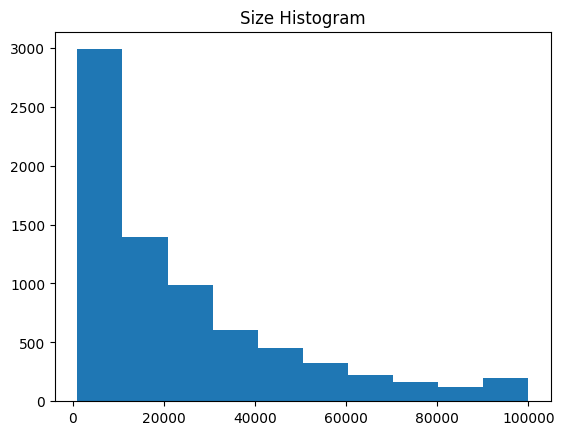

In [30]:
plt.hist(df.Size)
plt.title("Size Histogram")
plt.show()

#### 7.Outlier treatment
#### 7.1 Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!Check out the records with very high price. Is 200 indeed a high price?
#### Drop these as most seem to be junk apps

In [31]:
df[df.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,NaN,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [32]:
df = df.drop(df[(df.Price > 200)].index)

In [33]:
df.shape

(9338, 13)

#### 7.2 Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [34]:
df[df.Reviews > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,NaN,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
9841,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,NaN,100000000,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [35]:
df = df.drop(df[(df.Reviews > 2000000)].index)

In [36]:
df.shape

(8885, 13)

#### 7.3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis. 7.3.1 Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [37]:
df.Installs.quantile([0.10, 0.25, 0.50, 0.70, 0.90, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

#### 7.3.2 Decide a threshold as cutoff for outlier and drop records having values more than that

In [38]:
df = df.drop(df[(df.Installs > 10000000)].index) #(Choosing 90 percentile as cut-off and dropping values more than 90%)

In [39]:
df.shape

(8496, 13)

#### 8. Bivariate Analysis
#### 8.1 Make scatter plot/joinplot for Rating vs. Price

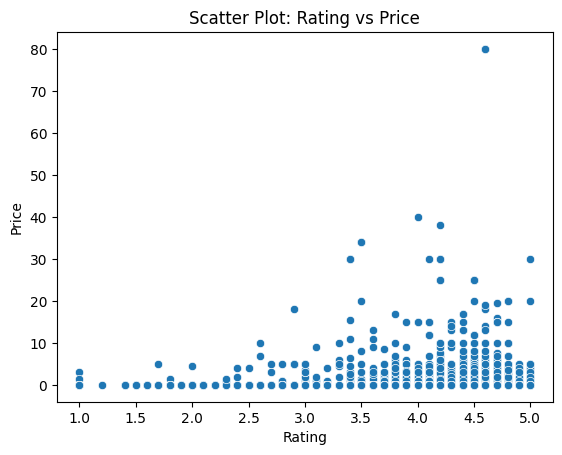

Inference: Paid apps have much higher rating


In [40]:
sns.scatterplot(x= "Rating", y = "Price", data = df)
plt.title("Scatter Plot: Rating vs Price")
plt.show()
print("Inference: Paid apps have much higher rating")

#### 8.2 Make scatter plot/joinplot for Rating vs. Size

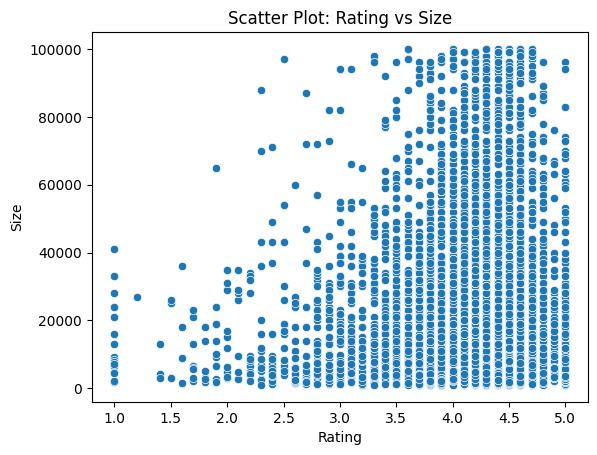

Inference: Apps with higher size have higher ratings


In [41]:
sns.scatterplot(x= "Rating", y = "Size", data = df)
plt.title("Scatter Plot: Rating vs Size")
plt.show()
print("Inference: Apps with higher size have higher ratings")

#### 8.3 Make scatter plot/joinplot for Rating vs. Reviews

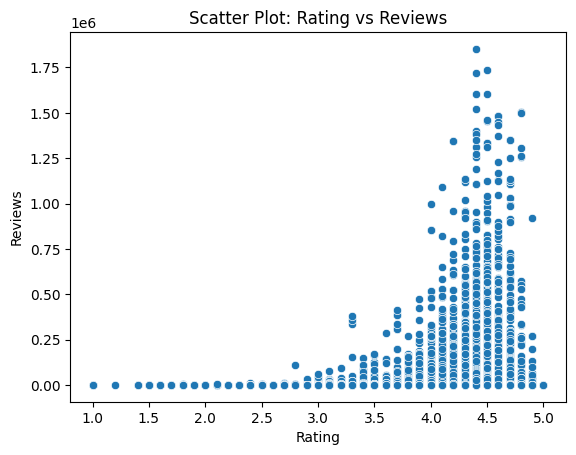

Inference: Apps that have higher number of reviews have high Ratings


In [42]:
sns.scatterplot(x= "Rating", y = "Reviews", data = df)
plt.title("Scatter Plot: Rating vs Reviews")
plt.show()
print("Inference: Apps that have higher number of reviews have high Ratings")

#### 8.4 Make boxplot for Rating vs. Content Rating

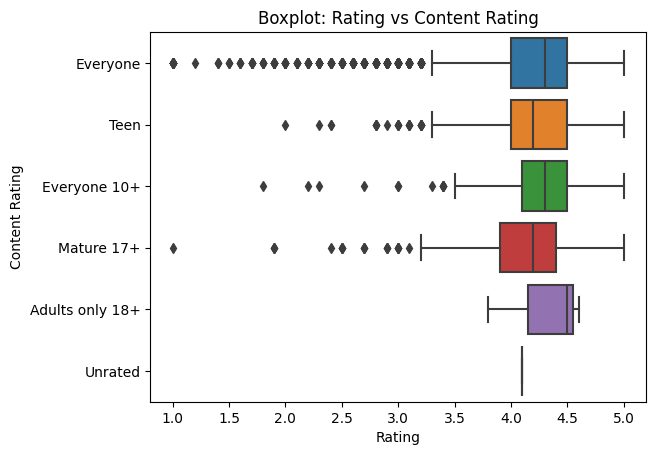

Inference: Apps for everyone has many outliers and has majority of lower ratings as well compared to other types


In [43]:
sns.boxplot(x = "Rating", y = "Content Rating", data = df)
plt.title("Boxplot: Rating vs Content Rating")
plt.show()
print("Inference: Apps for everyone has many outliers and has majority of lower ratings as well compared to other types") 

#### 8.5 Make boxplot for Ratings vs. Category

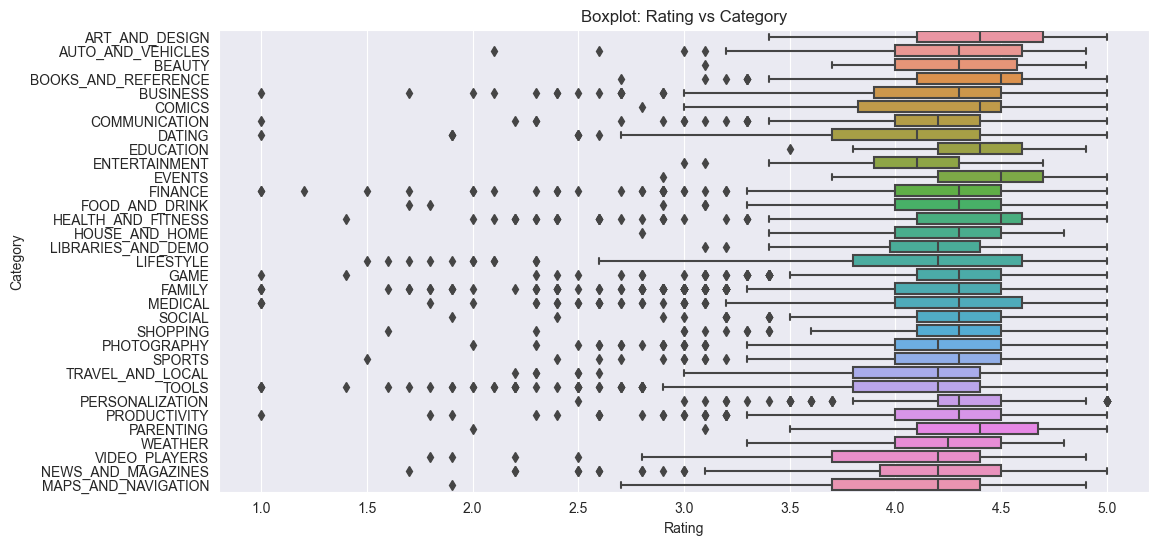

Inference: Art and Design, Events and Parenting have the best ratings


In [44]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.boxplot(x = "Rating", y = "Category", data = df)
plt.title("Boxplot: Rating vs Category")
plt.show()
print("Inference: Art and Design, Events and Parenting have the best ratings") 

#### 9. Data Preprocessing For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
#### 9.1 Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs

In [45]:
inp1 = df.copy()

In [46]:
inp1.shape

(8496, 13)

In [47]:
inp1.skew()

C:\Users\HP\AppData\Local\Temp\ipykernel_4036\3545313420.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  inp1.skew()


Rating      -1.749753
Reviews      4.576494
Size         1.510450
Installs     1.543697
Price       16.264811
dtype: float64

In [48]:
review_skew = np.log1p(inp1['Reviews'])
inp1['Reviews'] = review_skew

In [49]:
review_skew.skew()

-0.20039949659264134

In [50]:
installs_skew = np.log1p(inp1['Installs'])
inp1['Installs'] = installs_skew

In [51]:
installs_skew.skew()

-0.5097286542754812

In [52]:
inp1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


#### 9.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [53]:
inp1 = inp1.drop(['App','Last Updated', 'Current Ver', 'Android Ver', 'Type'], axis = 1) #Also dropping Type

In [54]:
inp1

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,2.079442,2600.0,6.216606,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,53000.0,8.517393,0.0,Everyone,Education
10837,FAMILY,5.0,1.609438,3600.0,4.615121,0.0,Everyone,Education
10839,BOOKS_AND_REFERENCE,4.5,4.744932,NaN,6.908755,0.0,Mature 17+,Books & Reference


#### 9.3 Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [55]:
inp2 = pd.get_dummies(inp1, columns = ['Category', 'Content Rating', 'Genres'], drop_first = True)

In [56]:
inp2.head(5)

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 10. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [63]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

#### 11.  Separate the dataframes into X_train, y_train, X_test, and y_test.

In [64]:
y_train = df_train.pop('Rating')
x_train = df_train

y_test = df_test.pop('Rating')
x_test = df_test

#### 12. Model building . Use linear regression as the technique . Report the R2 on the train set

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [66]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [67]:
y_train_pred = lr.predict(x_train)

In [68]:
R_train = r2_score(y_train,y_train_pred)
print("R-squared data for the training dataset is: ", R_train)

R-squared data for the training dataset is:  0.1499545619850774


#### 13. Make predictions on test set and report R2.

In [69]:
y_test_pred = lr.predict(x_test)

In [70]:
R_test = r2_score(y_test,y_test_pred)
print("R-squared data for the test dataset is: ", R_test)

R-squared data for the test dataset is:  0.14332349058883642
